In [1]:

import pandas as pd
import yfinance as yf
import mplfinance as mpf

In [2]:
TICKER = "AAPL"

df = yf.download(TICKER, 
                 start="2020-07-01", 
                 end="2020-12-31", 
                 auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-30,89.040165,90.499116,89.020386,90.207321,140223200
2020-07-01,90.286444,90.840346,89.987239,90.036690,110737200
2020-07-02,90.961518,91.609387,89.920476,90.036690,114041600
2020-07-06,91.493181,92.922452,91.461033,92.445206,118655600
2020-07-07,92.830962,93.624725,92.044617,92.158363,112424400
...,...,...,...,...,...
2020-12-23,131.183131,131.451125,129.813327,129.992004,88223700
2020-12-24,130.349318,132.473499,130.130943,130.994507,54930100
2020-12-28,132.999602,136.324831,132.523139,135.679642,124486200


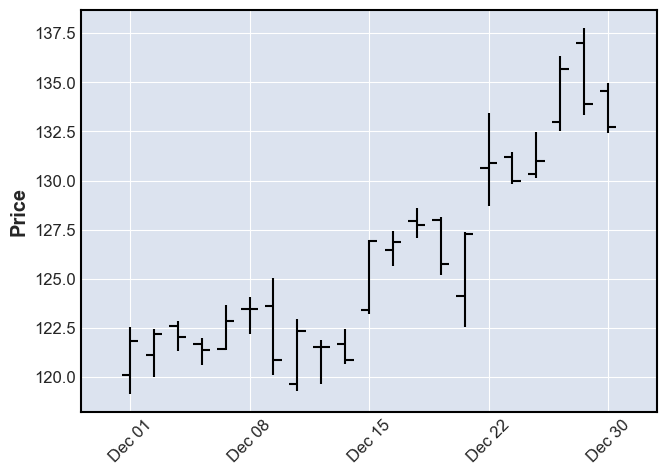

In [6]:
mpf.plot(df["2020-12-01":])

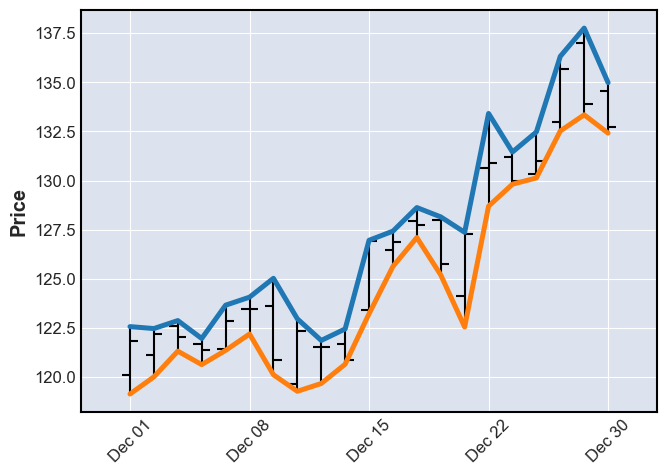

In [7]:

extra_plot  = mpf.make_addplot(df.loc["2020-12-01":, ["High","Low"]])
mpf.plot(df["2020-12-01":], addplot=extra_plot)

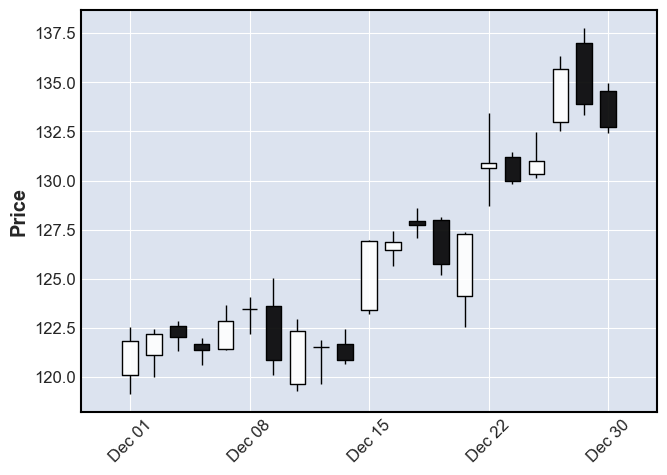

In [8]:
mpf.plot(df["2020-12-01":], type="candle")

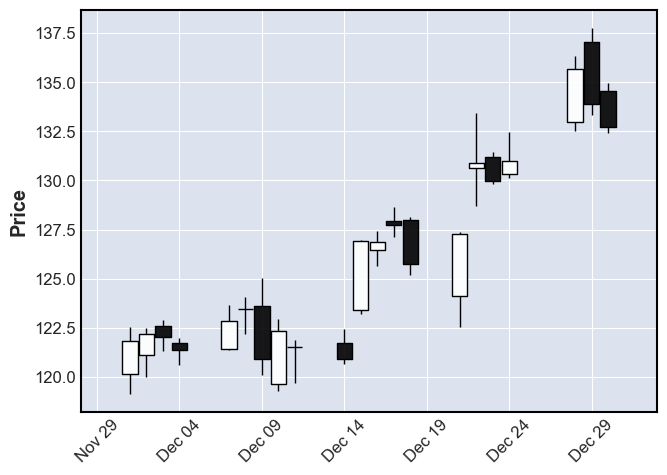

In [9]:
mpf.plot(df["2020-12-01":], type="candle", show_nontrading=True)

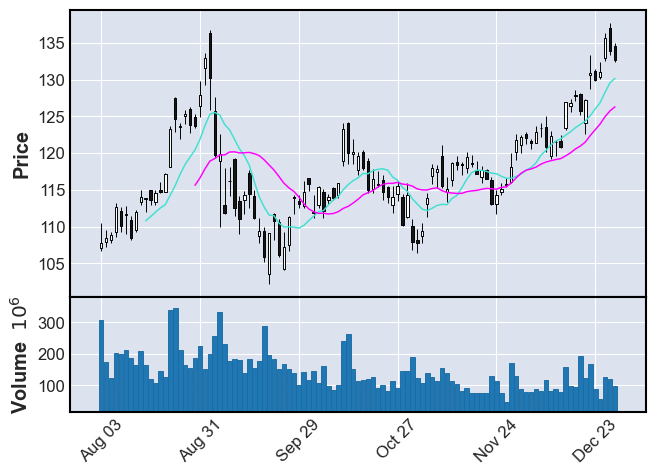

In [13]:
mpf.plot(df["2020-08-01":], type="candle", mav=(10, 20), volume=True)


The most common use of the Renko chart is to filter out noise from the price series and to help with identifying trends in the prices.

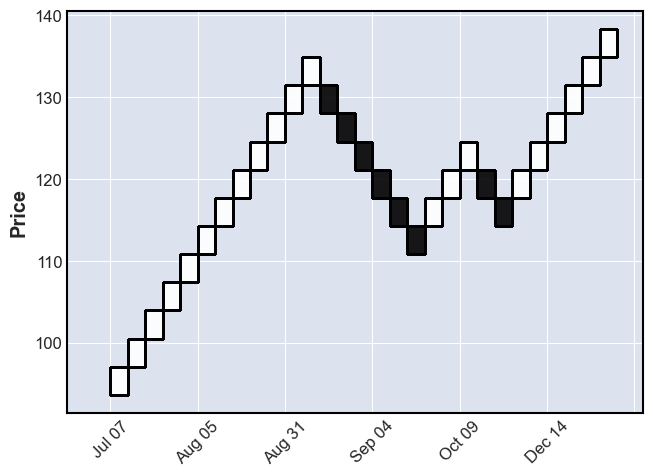

In [14]:
mpf.plot(df,type="renko")

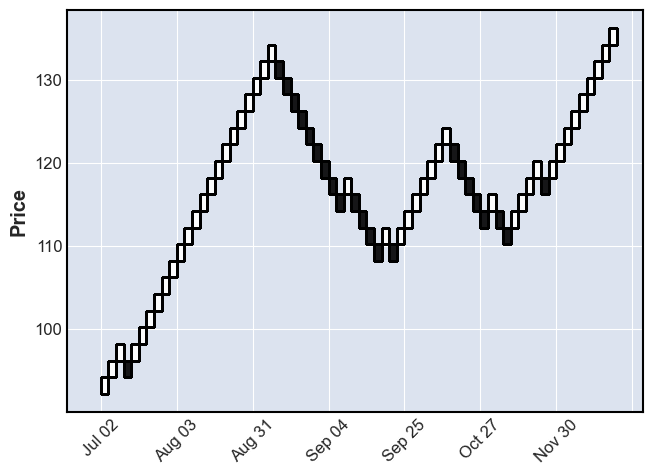

In [15]:
mpf.plot(df, type="renko", renko_params=dict(brick_size=2))

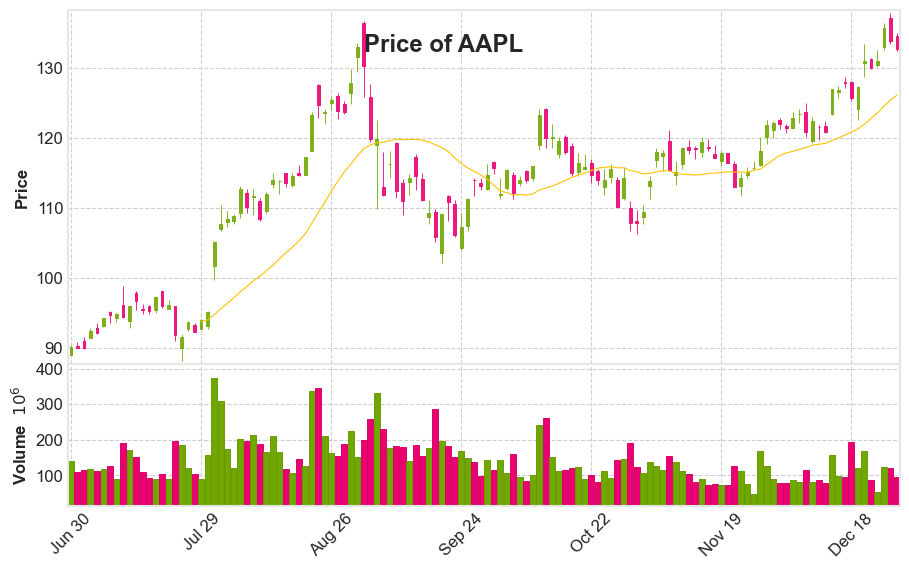

In [16]:

mpf.plot(df, figratio=(10, 6), type="candle", 
         mav=(21), volume=True,
         title = f"Price of {TICKER}",
         tight_layout=True, style="binance")

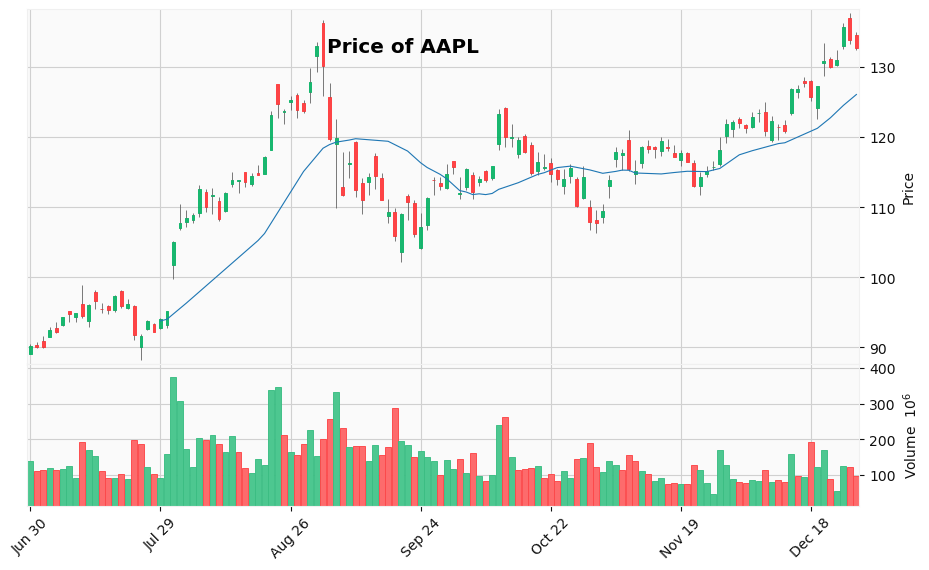

In [17]:

mpf.plot(df, figratio=(10, 6), type="candle", 
         mav=(21), volume=True,
         title = f"Price of {TICKER}",
         tight_layout=True, style="yahoo")

In [18]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

binance


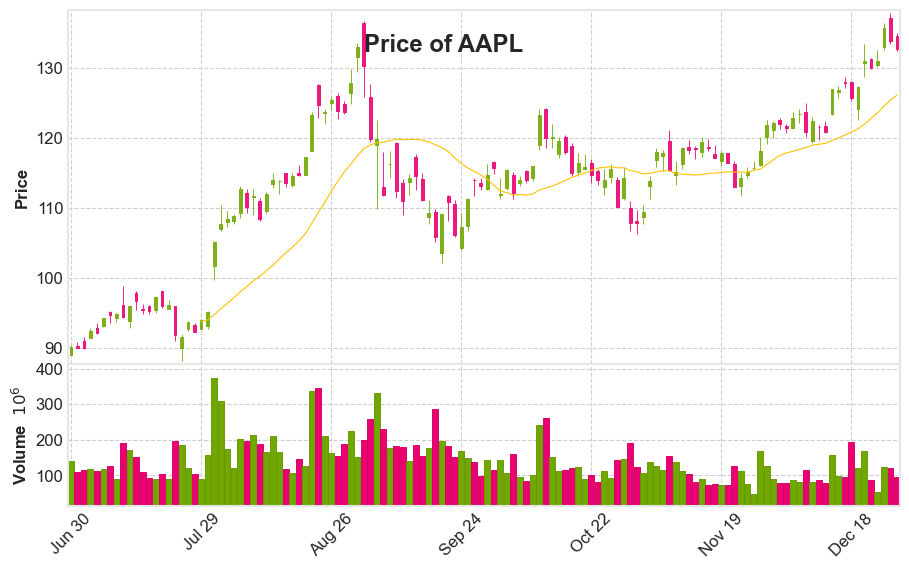

blueskies


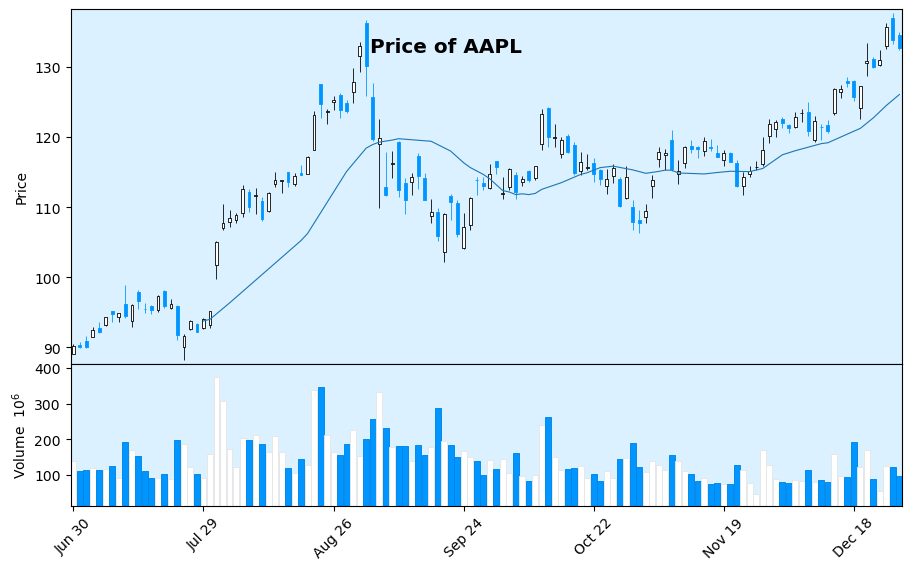

brasil


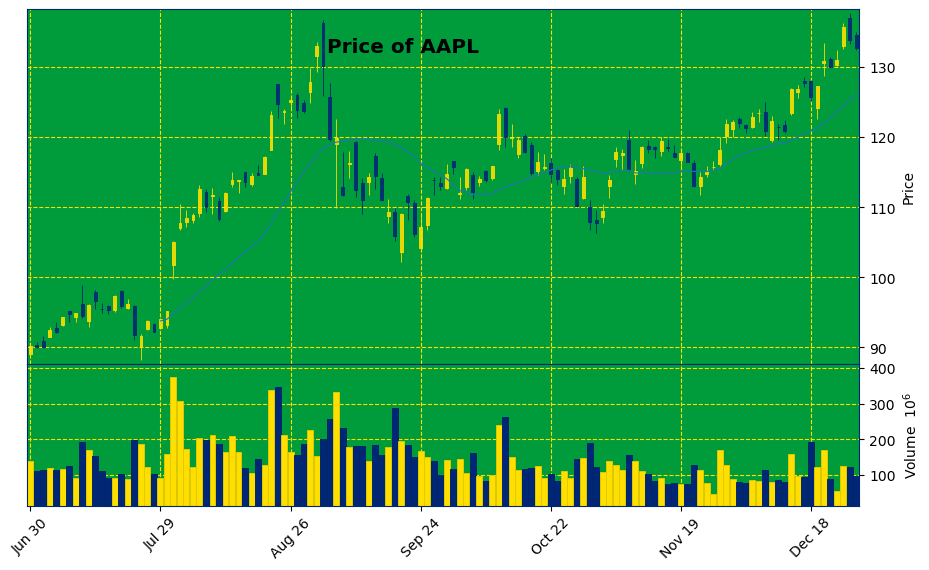

charles


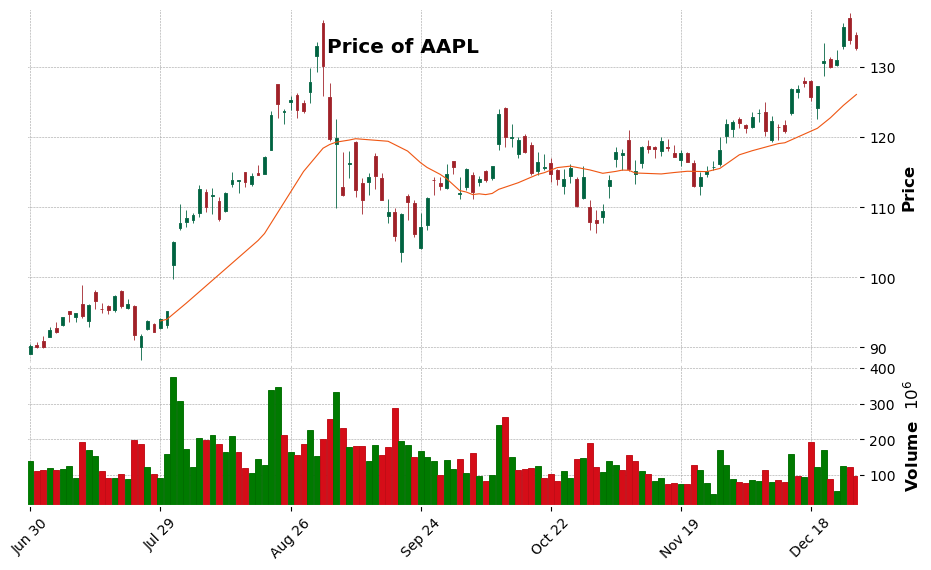

checkers


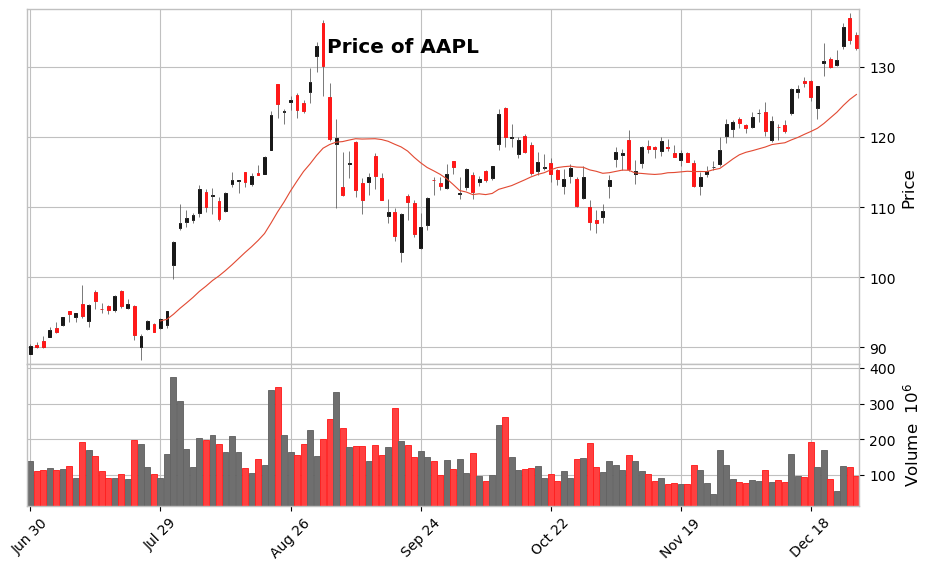

classic


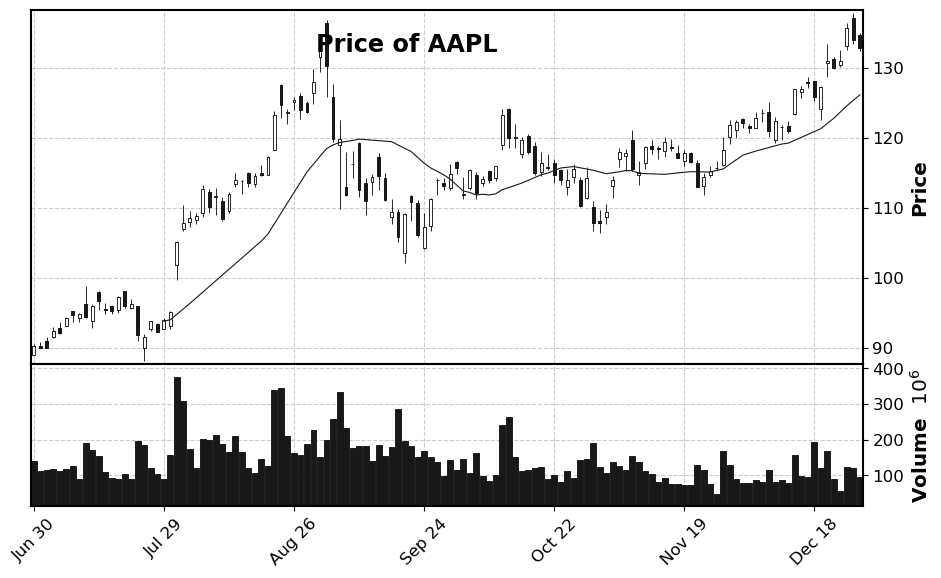

default


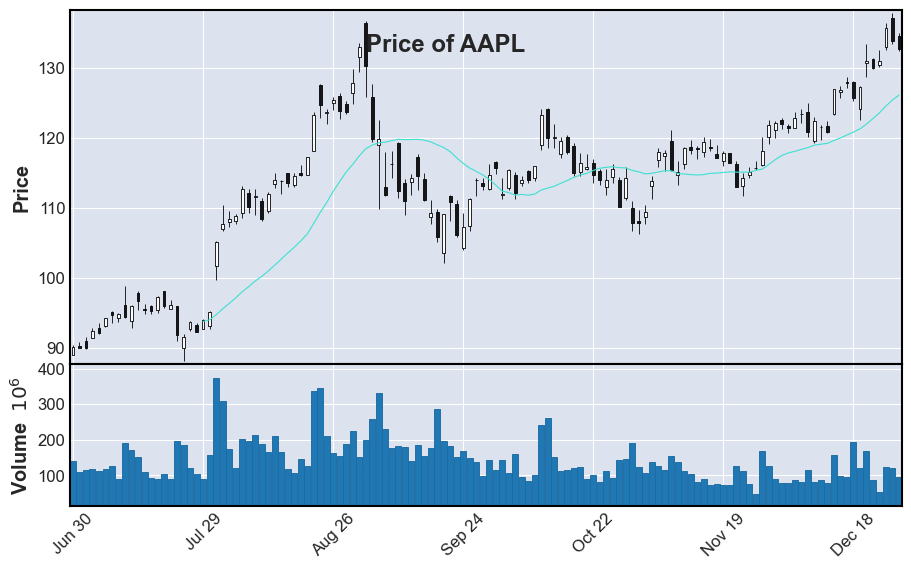

ibd


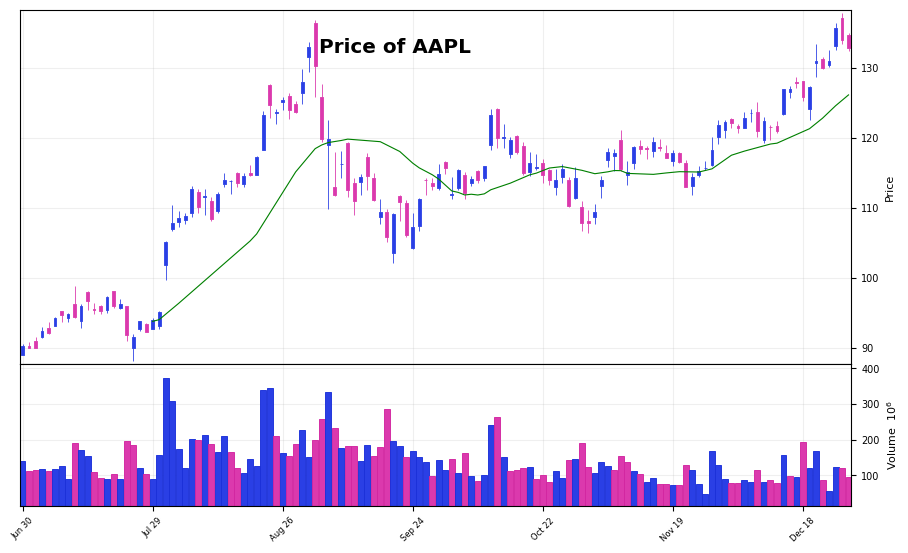

kenan


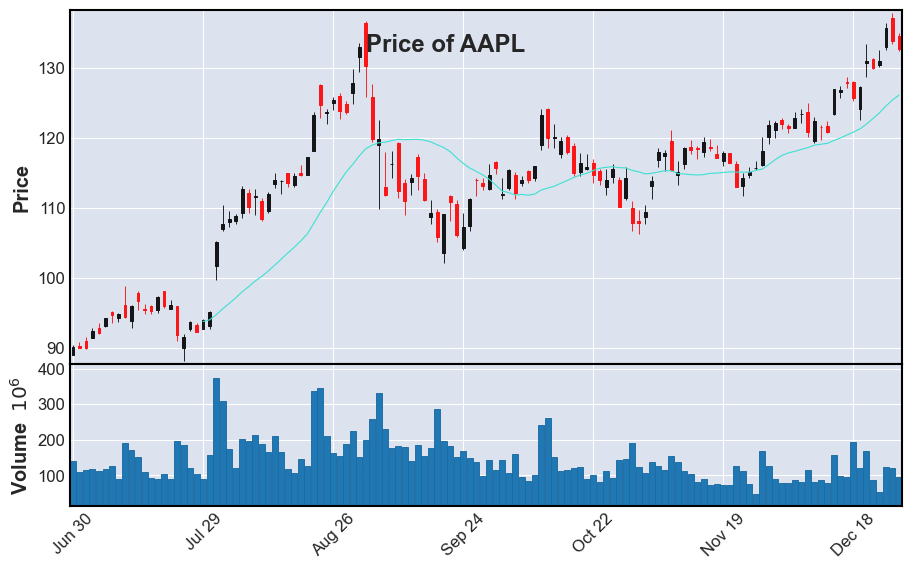

mike


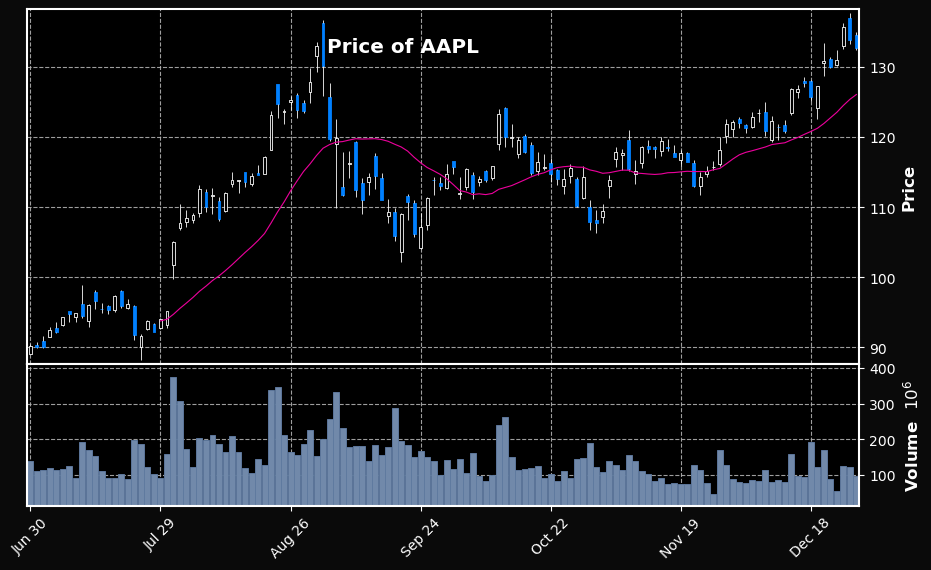

nightclouds


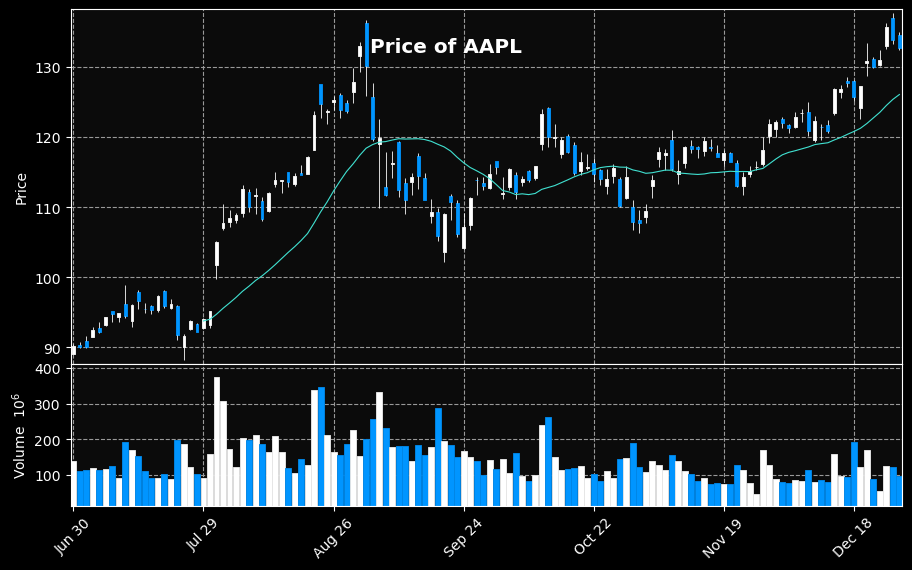

sas


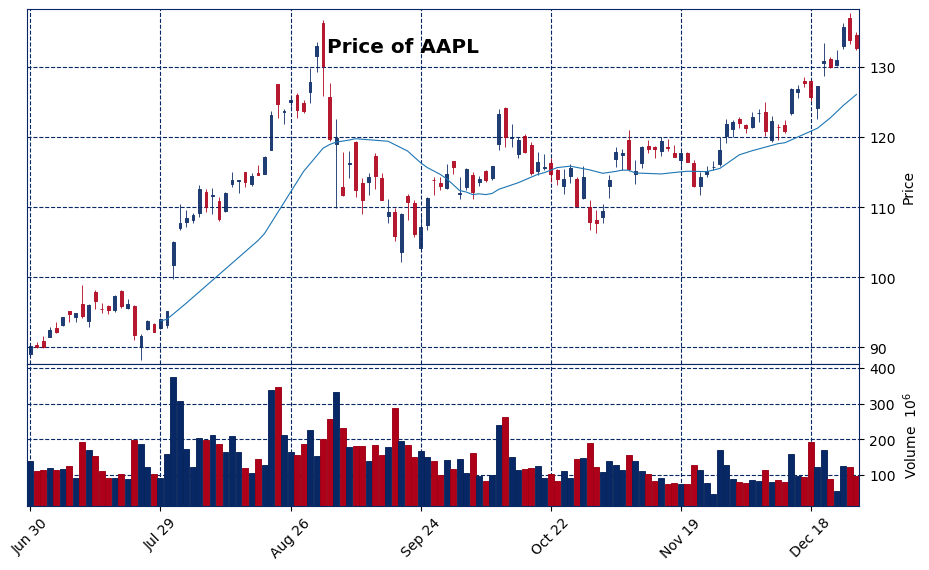

starsandstripes


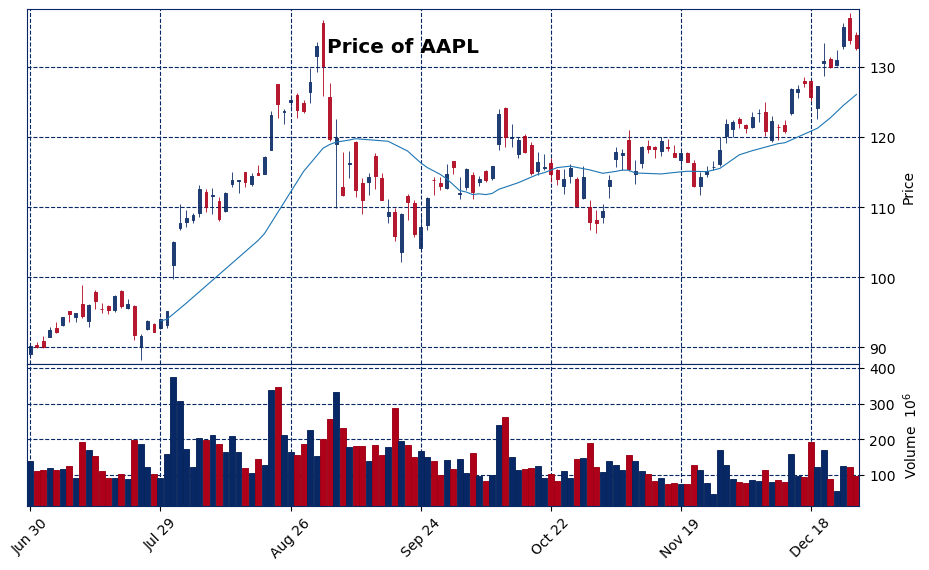

yahoo


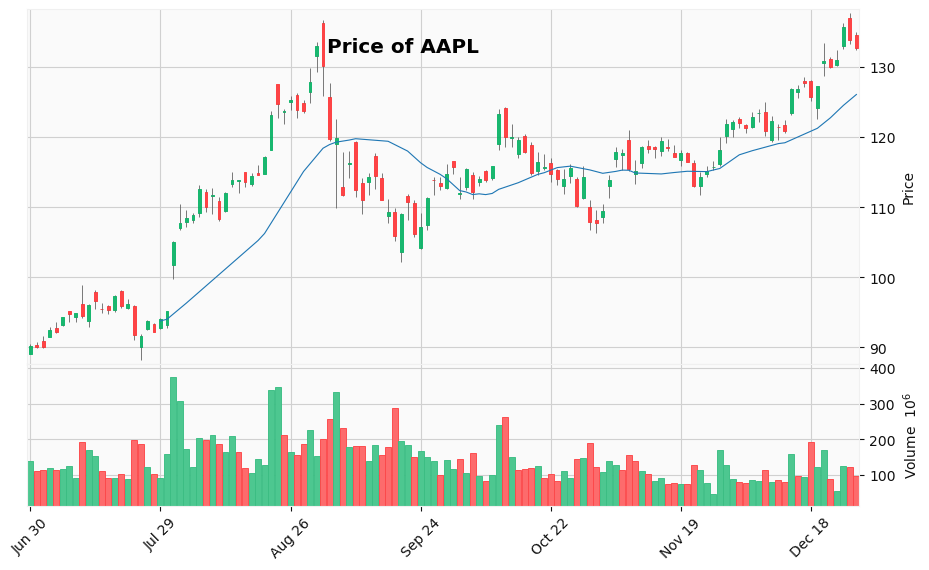

In [19]:
for style in mpf.available_styles():
    print(style)
    mpf.plot(df, figratio=(10, 6), type="candle", 
            mav=(21), volume=True,
            title = f"Price of {TICKER}",
            tight_layout=True, style=style)

In [22]:
mpf.plot(df, figratio=(10, 6), type="candle", 
         mav=(21), volume=True,
         title = f"Price of {TICKER}",
         tight_layout=True, style="yahoo", 
         savefig=f"{TICKER}.png")

Yahoo style is the best

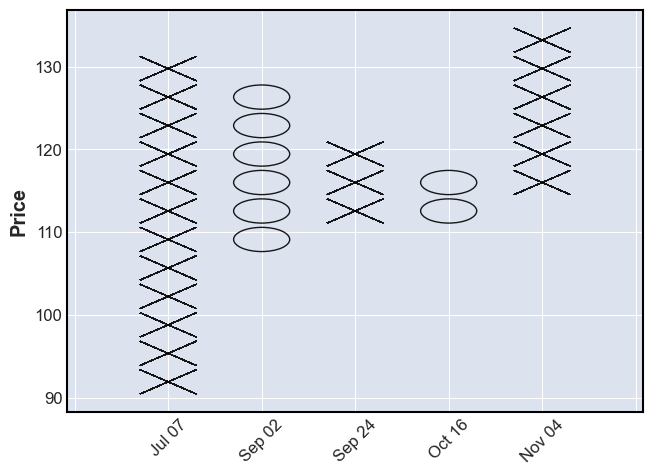

In [24]:
mpf.plot(df, type="pnf")

## How to get data ?

There are many alternatives out there (Quandl, Intrinion, AlphaVantage, Tiingo, IEX Cloud, etc.), however, Yahoo Finance can be considered the most popular as it is the easiest one to access 

In [31]:
!pip install YahooFinancials

In [36]:
from yahoofinancials import YahooFinancials

assets = ['TSLA', 'MSFT', 'FB']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})
prices_df.head()

,TSLA,MSFT,FB
2019-01-01,66.991997,98.487747,138.050003
2019-01-08,66.879997,98.478111,145.389999
2019-01-15,60.452000,103.939995,150.039993
2019-01-22,59.276001,101.402039,147.470001
2019-01-29,62.577999,102.038940,169.250000


<AxesSubplot:>

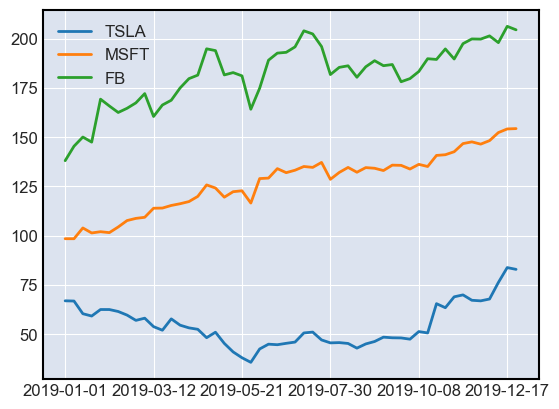

In [37]:
prices_df.plot()